<a href="https://colab.research.google.com/github/MohanVishe/Supervised-ML--Classification----Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -**<font color='green'> Mobile Price Range Prediction</font>      



#### **Project Type**    - Classification
#### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/MohanVishe/Supervised-ML--Classification----Mobile-Price-Range-Prediction

# <font color='red'> Problem Statement </font>


The smartphones market is a highly competitive market where Most of companies keep launching new models with small technology changes such as battery power, camera configuration, and processor.So we have to understand how the features of mobile phone affect the price range. 

# <font color='red'> Business Context </font>

In the competitive mobile phone market, companies want to understand mobile phone sales data and the factors driving the prices. The objective is to find out some relation between the features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## <font color='red'>***1. Know Your Data***</font>

### Dataset Description

* **Battery_power** - Battery capacity in mAh
* **Blue** - Has bluetooth or not
* **Clock_speed** - speed at which microprocessor executes instructions
* **Dual_sim** - Has dual sim support or not
* **Fc** - Front Camera mega pixels
* **Four_g** - Has 4G or not
* **Int_memory** - Internal Memory capacity in  Gigabytes
* **M_dep** - Mobile Depth in cm
* **Mobile_wt** - Weight of mobile phone
* **N_cores** - Number of cores of processor
* **Pc** - Primary Camera mega pixels
* **Px_height** - Pixel Resolution Height
* **Px_width** - Pixel Resolution Width
* **Ram** - Random Access Memory in Mega
* **Touch_screen** - Has touch screen or not
* **Wifi** - wifi is present or not
* **Sc_h** - Screen Height in cm
* **Sc_w** - Screen Width in cm
* **Talk_time** - longest time that a single battery charge will last when you are
* **Three_g** - 3G is present or not
* **Wifi** -  wifi is present or not
* **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost),3(very high cost)

### Import Libraries

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [4]:
# importing csv files as dataframe
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#)

df=pd.read_csv("/content/drive/MyDrive/Projects/ Supervised ML Classification (Mobile Price Range Prediction)  )/data_mobile_price_range.csv")

### Dataset First View

In [5]:
# Dataset First Look
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [6]:
df.tail(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [7]:
df.shape

(2000, 21)

### <font color='orange'> Observation </font>

* This is small dataset with total 2000 rows and 21 columns 
* The `price_range` feature is dependent where othere 20 features are independent

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

sum(df.duplicated())

0

#### Missing Values/Null Values

In [10]:
# Return dataset with boolean values with presence of null equal to True
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)
 
df.isna().sum().sum()

0

### <font color='orange'>Observation</font>

* The dataset don't have any duplicate values.
* The dataset don't contain any missing values.


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
# Dataset Describe

# checking all values including categorical data
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#)

df.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description 

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

# Checking number of unique values for each feature
# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)

df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [14]:
# value_counts() : number of values for each category of the features
# (https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

for i in df.columns:
  if len(df[i].value_counts()) >10:
    continue
  print(i)
  print(df[i].unique())
  print("-"*50)

blue
[0 1]
--------------------------------------------------
dual_sim
[0 1]
--------------------------------------------------
four_g
[0 1]
--------------------------------------------------
m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
--------------------------------------------------
n_cores
[2 3 5 6 1 8 4 7]
--------------------------------------------------
three_g
[0 1]
--------------------------------------------------
touch_screen
[0 1]
--------------------------------------------------
wifi
[1 0]
--------------------------------------------------
price_range
[1 2 3 0]
--------------------------------------------------


### <font color='orange'> Observation </font>

* The various features are binary such as `blue`,`dual_sim`,`four_g`,`three_g`,`touch_screen`,`wifi`, etc
* The columns with numerical data are `battery_power, clock_speed, fc,int_memory ,m_depth ,mobile_wt ,n_cores ,pc ,px_height ,px_width ,ram ,sc_h ,sc_w ,talk_time, n_cores`
* Minimum battery power is 501 where maximum is 1998 
* Clock speed is 0.5 to 3 Hz.
* Ram is between 256 to 3998.
* Data don't have missing values and duplicates

## 3. ***Data Wrangling***

### Data Wrangling Code

### Function for PDF and CDF

In [15]:
# Function for pdf and histogram of feature
plt.rcParams.update({'figure.figsize':(6,5),'figure.dpi':100})
def PDF (hue,feature):
  """This will plot pdf and Histograme of feature"""  
  
  sns.FacetGrid(df,hue=hue,size=5)\
  .map(sns.distplot,feature)\
  .add_legend();
  plt.title("histogram and  PDF of " + str(feature))
  plt.show()

In [16]:
# Function for pdf and cdf of a feature

def CDF(feature):
  "This will plot cdf of feature"
  df0=df[df["price_range"]==0]
  df1=df[df["price_range"]==1]
  df2=df[df["price_range"]==2]
  df3=df[df["price_range"]==3]

  counts,bin_edges=np.histogram(df0[feature],bins=10,density= True)
  pdf= counts/sum(counts) 
  cdf=np.cumsum(pdf)
  plt.plot(bin_edges[1:],cdf,label="Price Range 0 CDF")

  counts,bin_edges=np.histogram(df1[feature],bins=10,density= True)
  pdf= counts/sum(counts) 
  cdf=np.cumsum(pdf)
  plt.plot(bin_edges[1:],cdf,label="Price Range 1 CDF")

  counts,bin_edges=np.histogram(df2[feature],bins=10,density= True)
  pdf= counts/sum(counts) 
  cdf=np.cumsum(pdf)
  plt.plot(bin_edges[1:],cdf,label="Price Range 2 CDF")

  counts,bin_edges=np.histogram(df3[feature],bins=10,density= True)
  pdf= counts/sum(counts) 
  cdf=np.cumsum(pdf)
  plt.plot(bin_edges[1:],cdf,label="Price Range 3 CDF")

  plt.legend()
  plt.grid()
  plt.ylabel("probability")
  plt.xlabel(feature)
  plt.title(feature)
  plt.show()


### <font color='red'> Checking Weather Dataset is Imbalance or not </font>
we have to see value count of the dependent variable to check the dataset is imbalance of not

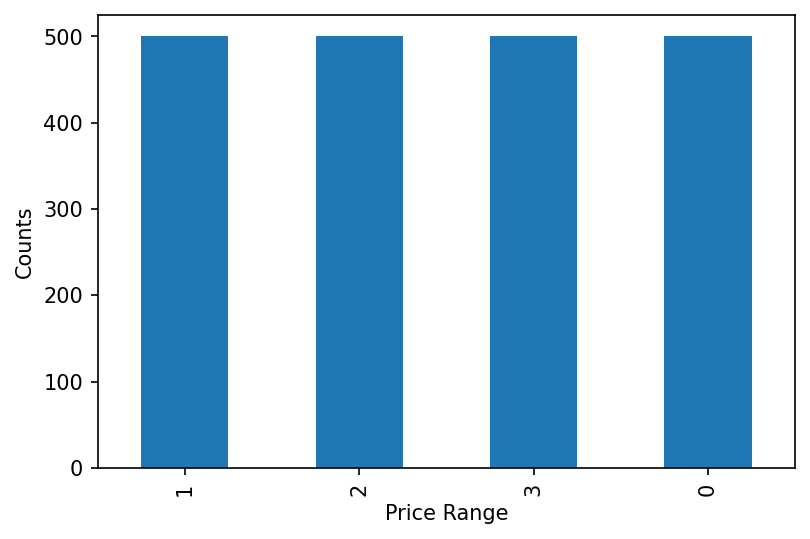

In [17]:
# for adjusting figure size  
# (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':150})


df['price_range'].value_counts().plot(kind='bar')
plt.xlabel("Price Range")
plt.ylabel("Counts")
plt.show()

### <font color='orange'>Observation</font>

*  The given dataset is prefectly balanced with each category of price range has 500 datapoints.

### **<font color='red'> Clean Up </font>**


### Lets see outliers in various feature with the help of box Plot.

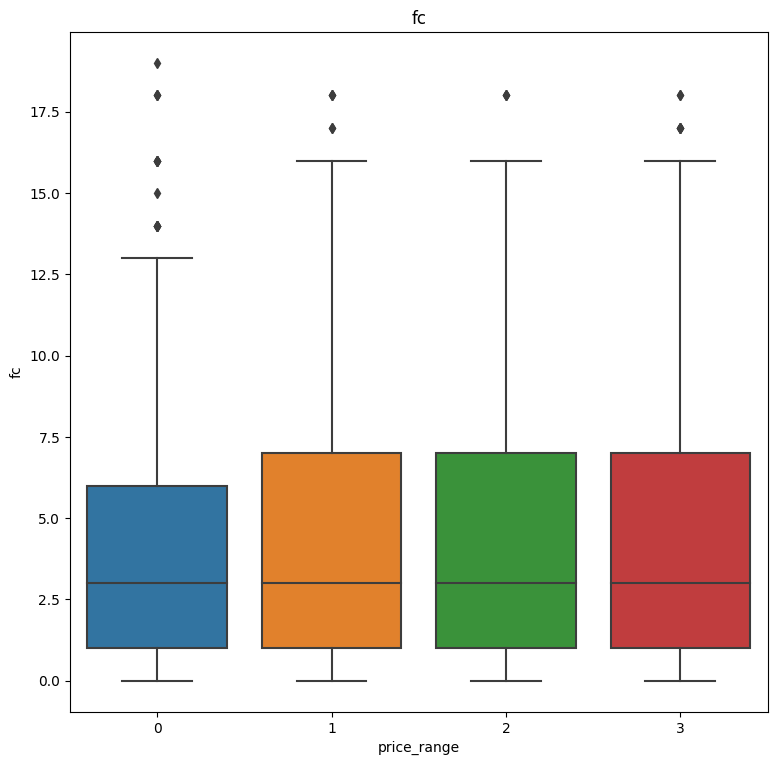

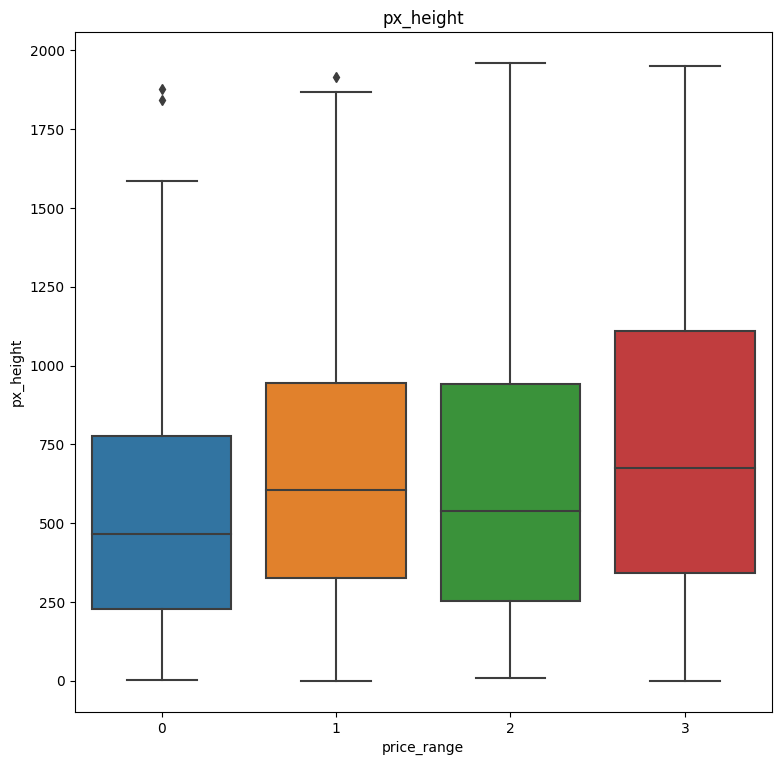

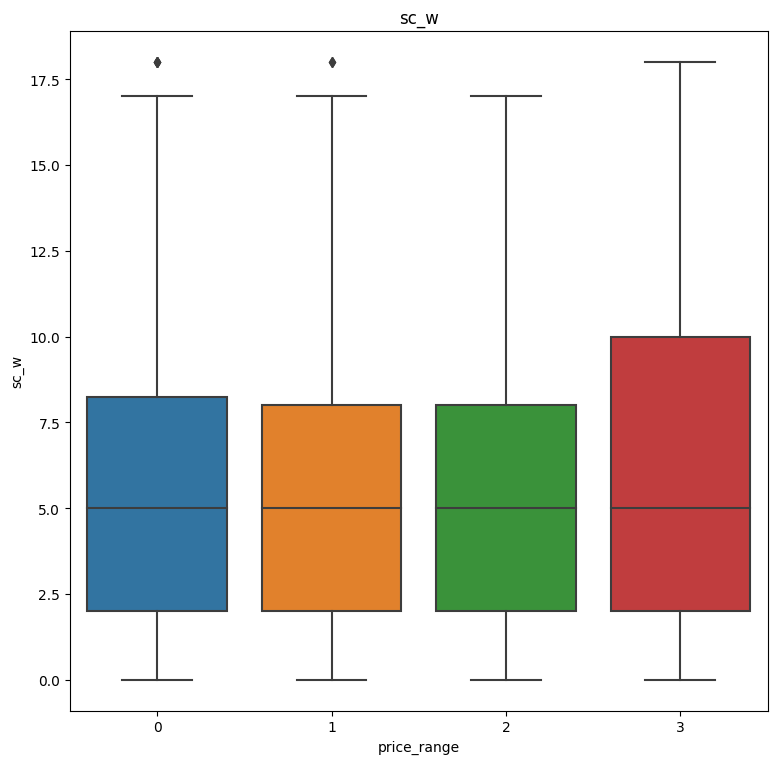

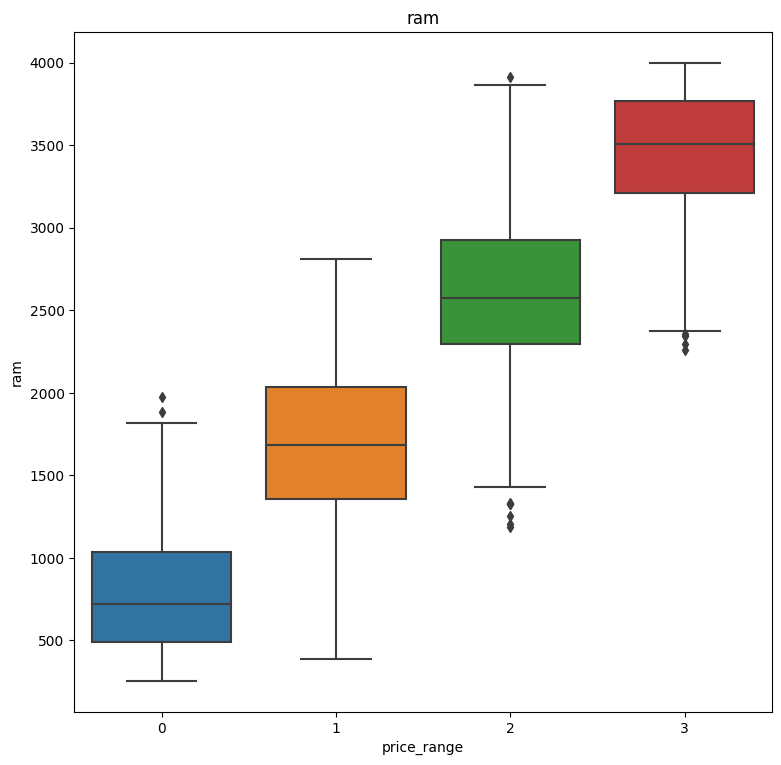

In [18]:
for i in ["fc","px_height","sc_w","ram"]:
  plt.rcParams.update({'figure.figsize':(9,9),'figure.dpi':100})
  # Boxplot
  # (https://seaborn.pydata.org/generated/seaborn.boxplot.html)
  sns.boxplot(x="price_range",y=i,data=df)
  plt.title(i)
  plt.show()

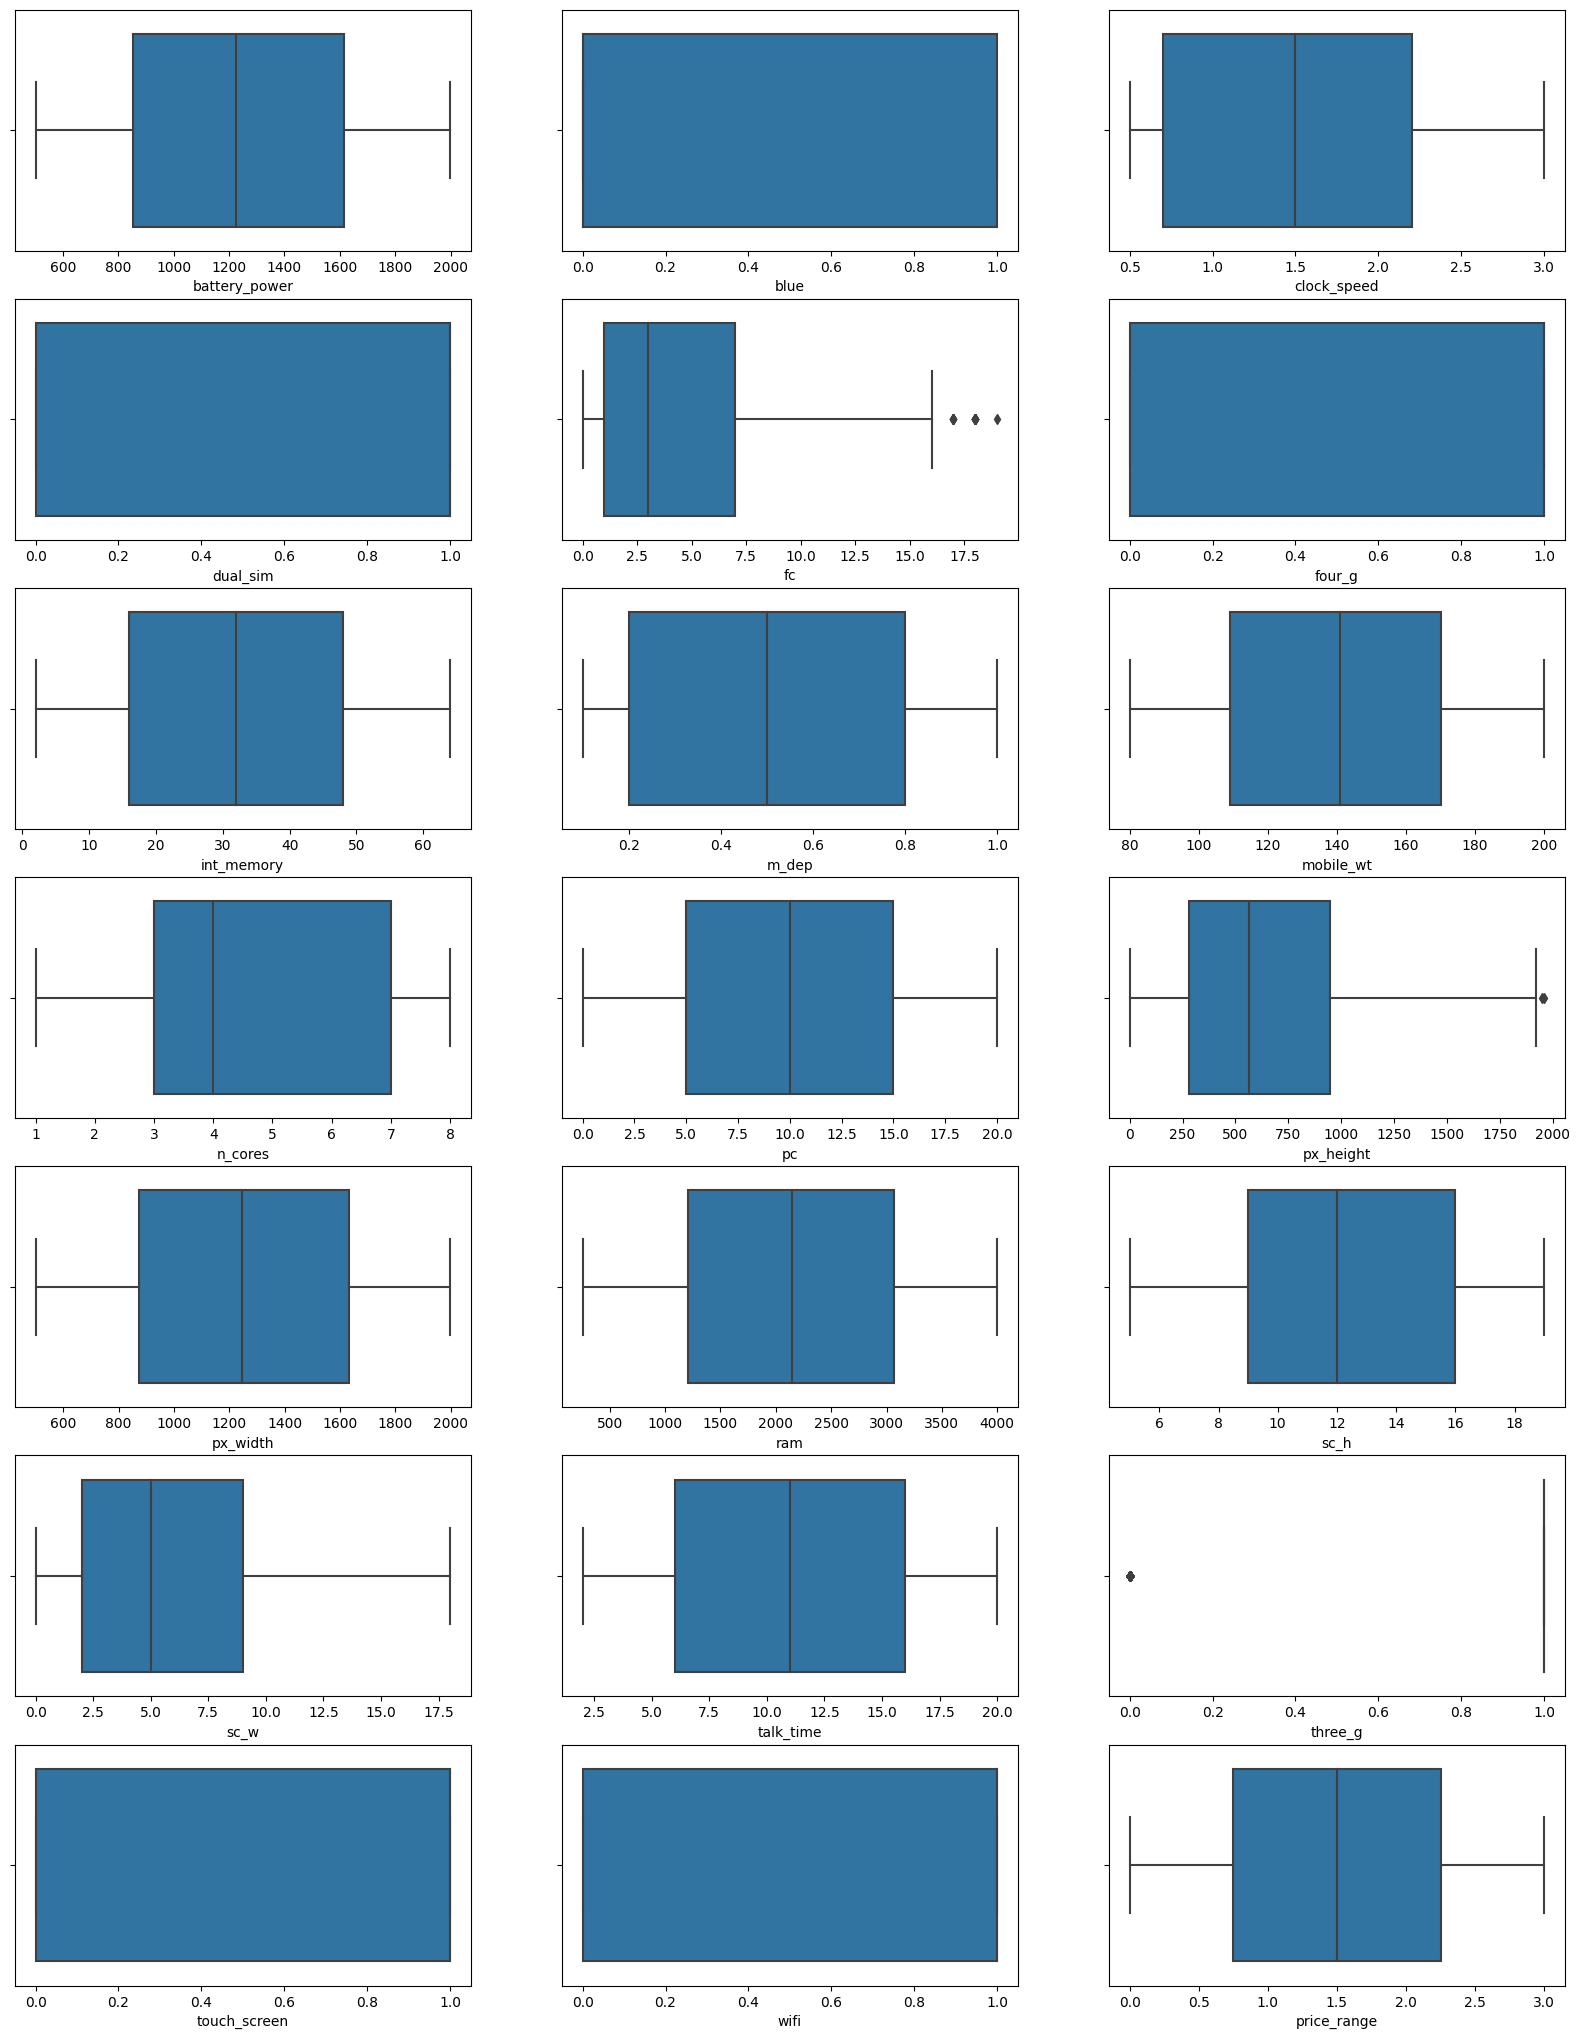

In [19]:
# looking for outliers using box plot
plt.figure(figsize=(20,30))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # many plot in one diagram
  # (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)
  plt.subplot(8,3,index+1)
  
  sns.boxplot(df[item])
print("\n")

### <font color='orange'>Observation</font>

* There are not much outliers present in the dataset.
* Cleanup is not mandatory

### What all manipulations have we done and insights we found?

* We have single dataset so no mergining required
* We dont have any outliers in data
* The dataset is prefectly balanced.


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **<font color='red'> Exploratory Data Analysis </font>**

* With the help of exploratory data analysis we will find the trends and patterns in the data and make our conclusion
* We will use matplotlib,Seaborn for visualization and pandas to explore data

#### Chart - 1 (Visualizing the Distribution of battery power across the price range.)

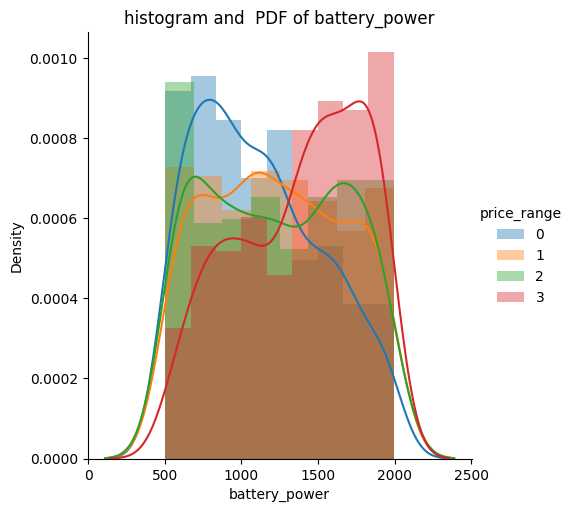

In [20]:
# Chart - 1 visualization code

PDF("price_range","battery_power")

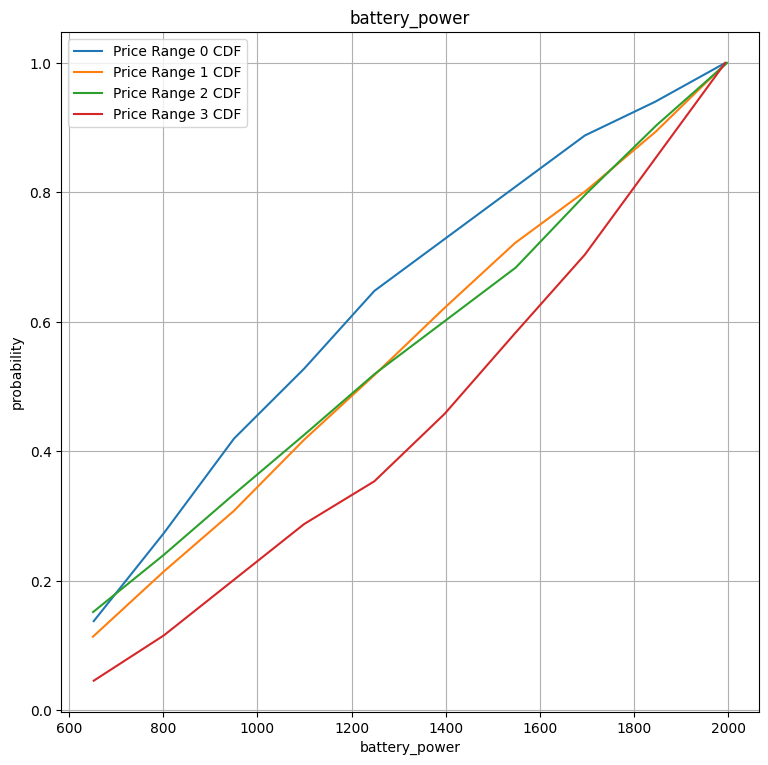

In [21]:
CDF("battery_power")

##### 1. Why did you pick the specific chart?

To see distribution of battery power across various price range we use PDF and CDF

##### 2. What is/are the insight(s) found from the chart?

### <font color='orange'>Observation</font>

*  For PDF we can see that the category 0 and 3 of price range are partially seperable.
*  Where distribution of battery power for category 1 and 2 are not seperable.
*  greater than 70% datapoints of class 0 comes under battery power of 1400 where around 45% datapoints comes under 1400.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The battery power is slightly positively correlated with the price range so higher end mobile should always have good battery storage.
* We can see that battey power could  be one of features which can impact price range slightly.

#### Chart - 2 (Visualizing the Distribution of pixel width across the price range.)

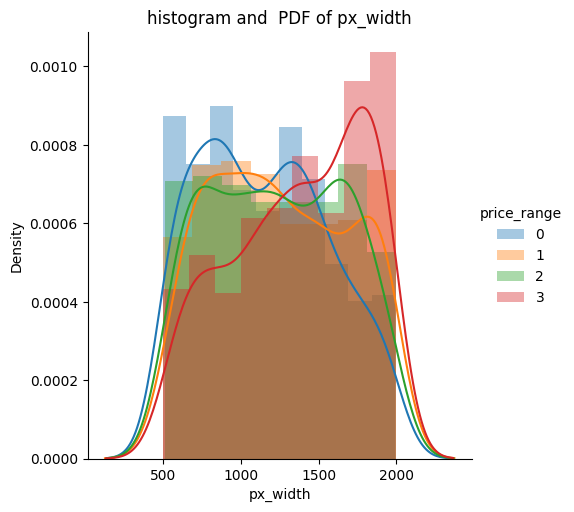

In [22]:
# Chart - 2 visualization code

PDF("price_range","px_width")

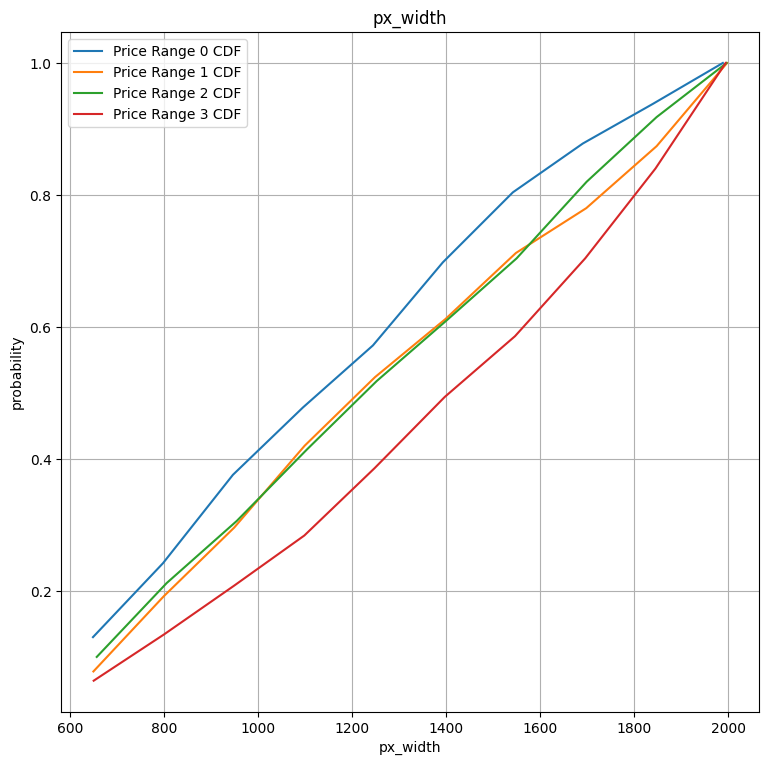

In [23]:
CDF("px_width")

##### 1. Why did you pick the specific chart?

To see distribution of `px_width` across various price range we use PDF and CDF

##### 2. What is/are the insight(s) found from the chart?

### <font color='orange'>Observation</font>

*  The pdf for class 0,1 is higher when pixel width is less than 1500.
*  The pdf for class 3 is higher when pixe width greater than 1500
*  Values are in range of 0.5 to 3.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Pixel width is slightly higher for the mobile phones with higer price range

#### Chart - 3 (Visualizing the Distribution of Ram across the price range.)

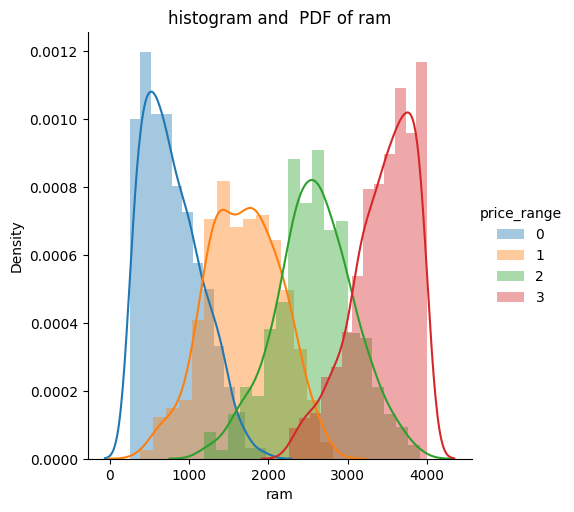

In [24]:
# Chart - 3 visualization code

PDF("price_range","ram")

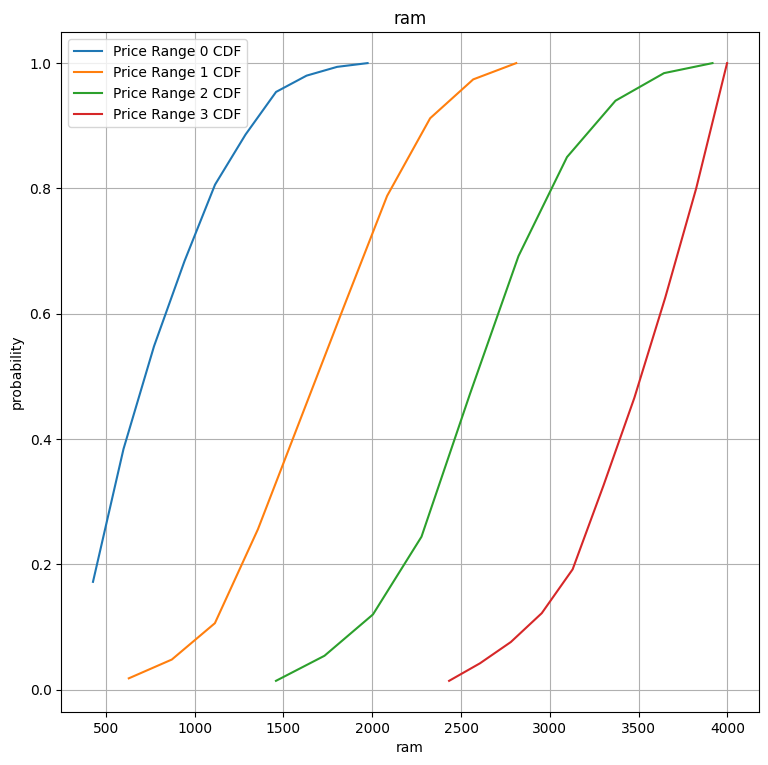

In [25]:
CDF("ram")

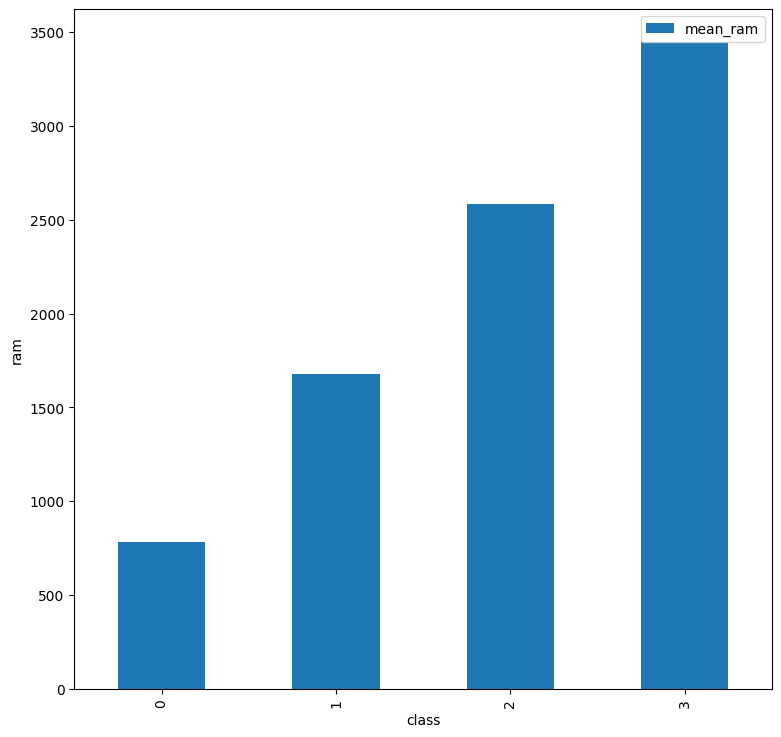

In [74]:
x=pd.DataFrame({"class":[0,1,2,3],"mean_ram":[df[df["price_range"]==0]["ram"].mean(),
                                 df[df["price_range"]==1]["ram"].mean(),
                                 df[df["price_range"]==2]["ram"].mean(),
                                 df[df["price_range"]==3]["ram"].mean()]})
x.plot.bar(x="class",y="mean_ram")
plt.ylabel("ram")
plt.show()

##### 1. Why did you pick the specific chart?

* To see distribution of ram across various price range we use PDF and CDF
* Bar plot to see mean ram for each class

##### 2. What is/are the insight(s) found from the chart?

### <font color='orange'>Observation</font>

*  For each class PDF of ram shows good seperation.
*  Mean of ram for class 0,1,2,3 are 785.314 ,1679.49 ,2582.816 , 3449.232 respectively

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The distribution for ram is giving best seperation as compair with other features
* The ram size is higher for higher price range.

#### Chart - 4 (Visualizing Distribution of remaining features)

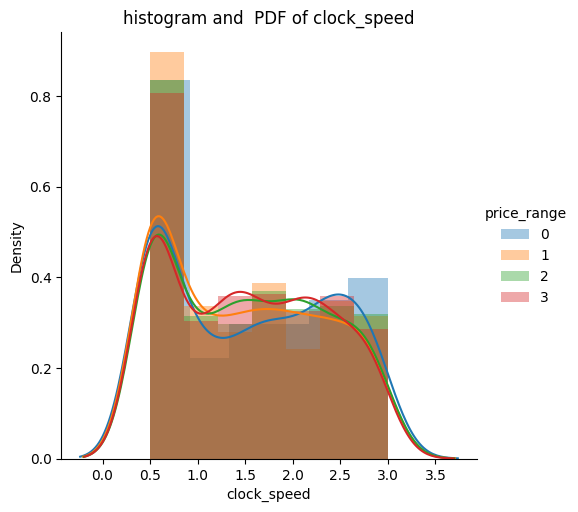

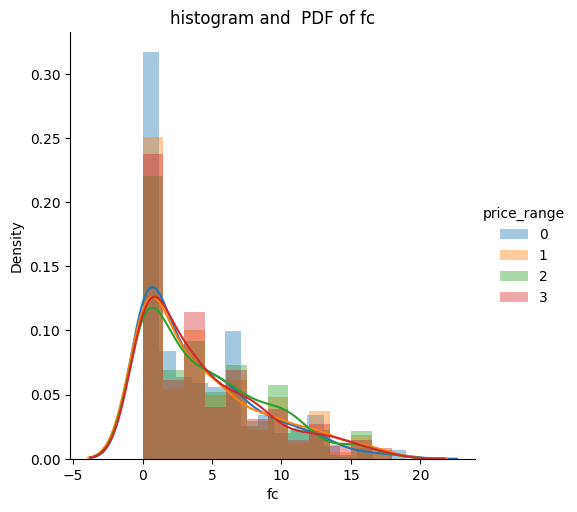

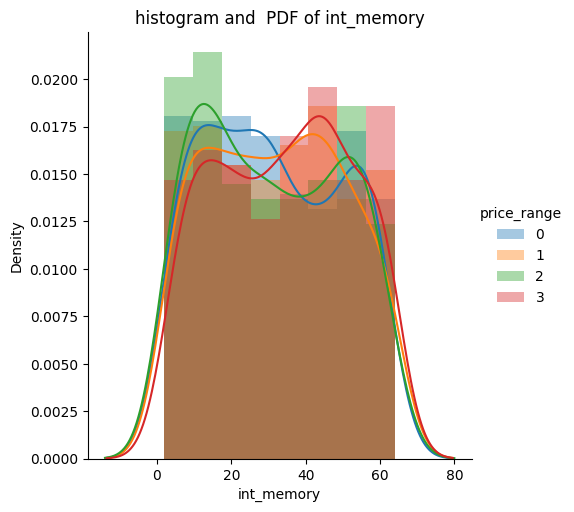

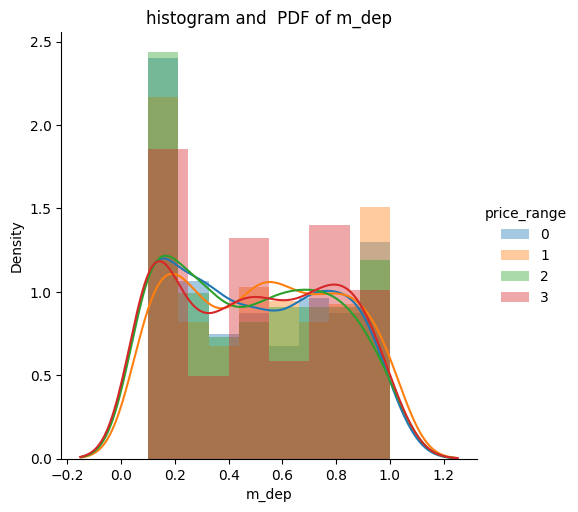

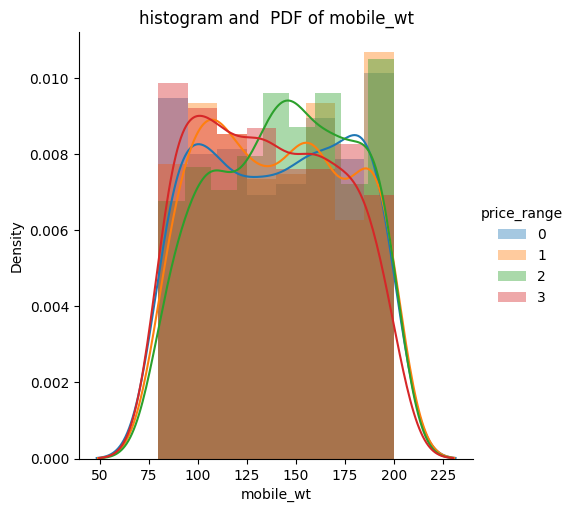

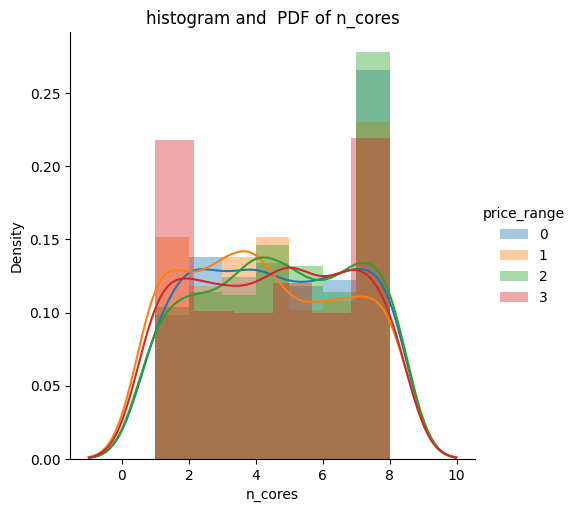

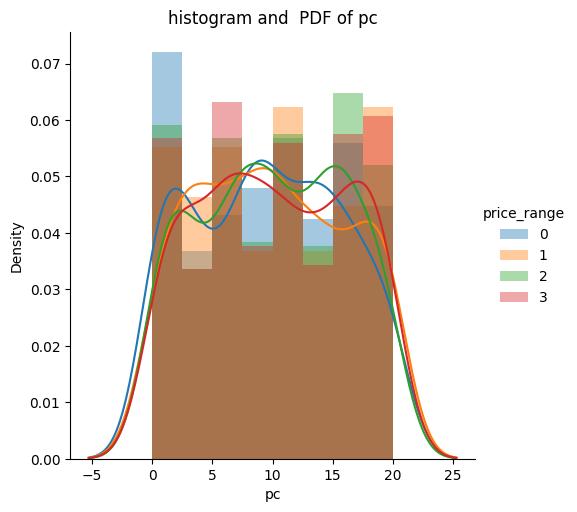

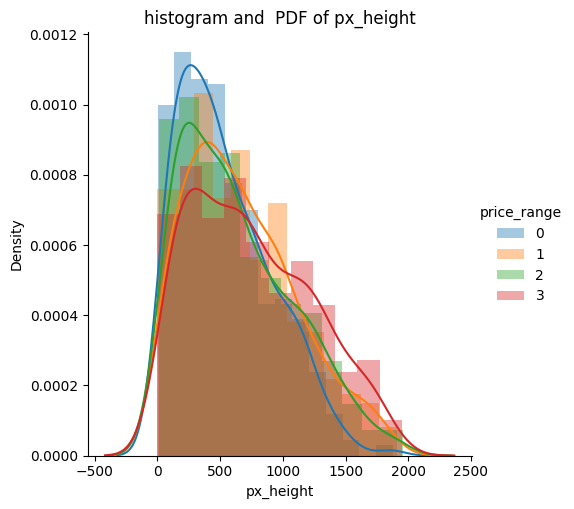

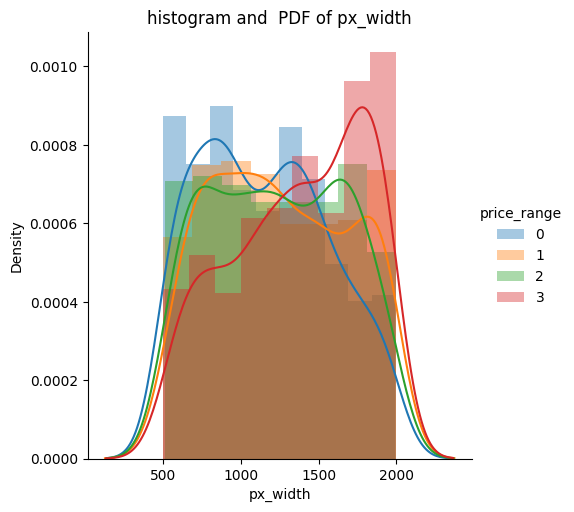

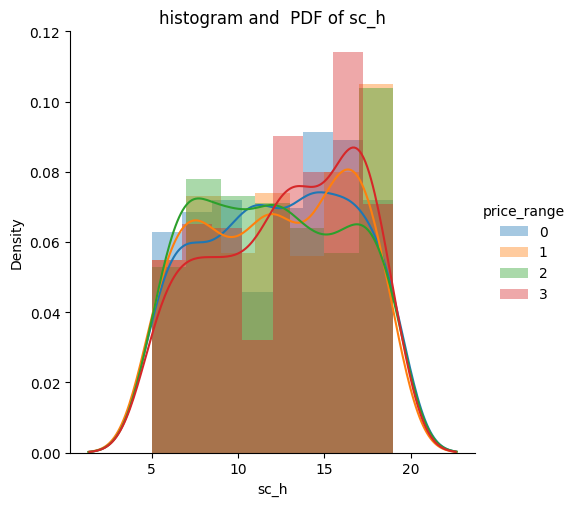

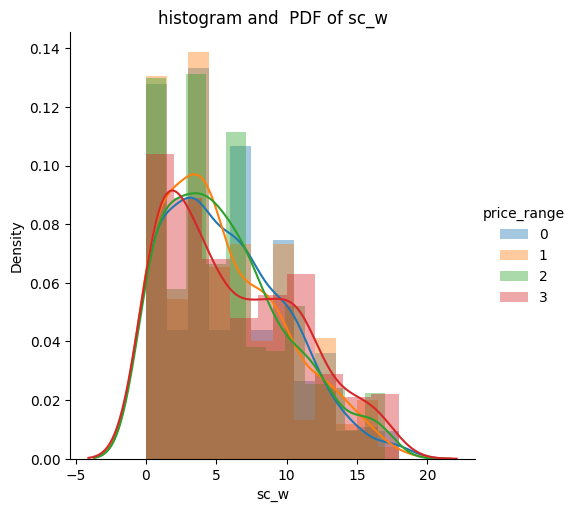

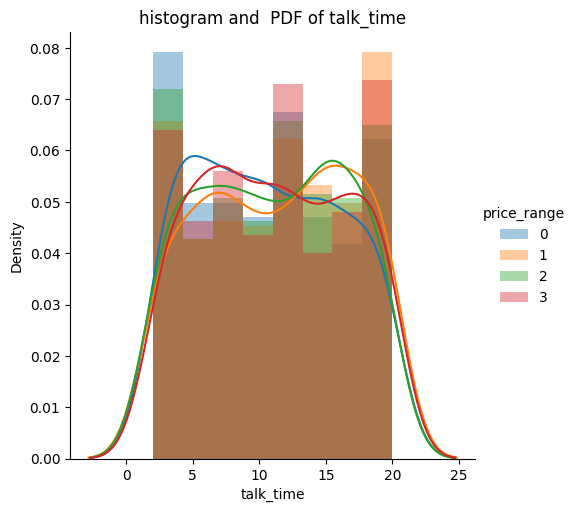

In [75]:
# Chart - 4 visualization code

for i in ["clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","sc_h","sc_w","talk_time"]:
  PDF("price_range",i)

##### 1. Why did you pick the specific chart?

* We use pdf to see how the features seperate the price range 

##### 2. What is/are the insight(s) found from the chart?

### <font color='orange'>Observation</font>

* For above features the overlapping is too much so it is difficult to seperate the classes.
* This could be because as time passes new models contain some of the features of higher price range in lower price range.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Generally all the features show positive correlation with the price range 
* As in mobile with higher price range companies try to give every features and the value of features is tends to higher.

#### Chart - 5

In [28]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [29]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [30]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [31]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [32]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [33]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [34]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [35]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [36]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [37]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [38]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [43]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [44]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [45]:
# Expand Contraction

#### 2. Lower Casing

In [46]:
# Lower Casing

#### 3. Removing Punctuations

In [47]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [48]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [49]:
# Remove Stopwords

In [50]:
# Remove White spaces

#### 6. Rephrase Text

In [51]:
# Rephrase Text

#### 7. Tokenization

In [52]:
# Tokenization

#### 8. Text Normalization

In [53]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [54]:
# POS Taging

#### 10. Text Vectorization

In [55]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [56]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [57]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [58]:
# Transform Your data

### 6. Data Scaling

In [59]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [60]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [61]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [62]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [63]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [68]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [71]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [72]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***